In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

# Define Image Size & Batch
IMG_SIZE = (299, 299)
BATCH_SIZE = 32

# Load Pre-trained InceptionV3 (Feature Extractor)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
feature_extractor = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))


In [2]:
# Freeze the Model
feature_extractor.trainable = False  

In [3]:
# Data Preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load Training Images
train_generator = datagen.flow_from_directory(
    r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\augmented_images\spiral\training',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Load Testing Images
test_generator = datagen.flow_from_directory(
    r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\spiral\testing',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 358 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [4]:
X_train = feature_extractor.predict(train_generator)
y_train = train_generator.classes  

X_test = feature_extractor.predict(test_generator)
y_test = test_generator.classes  

# Save Extracted Features
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("Feature extraction complete! Features saved successfully.")

c:\Users\HP-NBT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Feature extraction complete! Features saved successfully.


In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(kernel="linear", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42),
    "Boosting (Gradient Boosting)": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

In [8]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"  Accuracy  : {accuracy * 100:.2f}%")

Training Decision Tree...
Decision Tree Performance:
  Accuracy  : 73.33%
Training KNN...
KNN Performance:
  Accuracy  : 83.33%
Training SVM...
SVM Performance:
  Accuracy  : 76.67%
Training Random Forest...
Random Forest Performance:
  Accuracy  : 73.33%
Training Bagging...
Bagging Performance:
  Accuracy  : 73.33%
Training Boosting (Gradient Boosting)...
Boosting (Gradient Boosting) Performance:
  Accuracy  : 83.33%


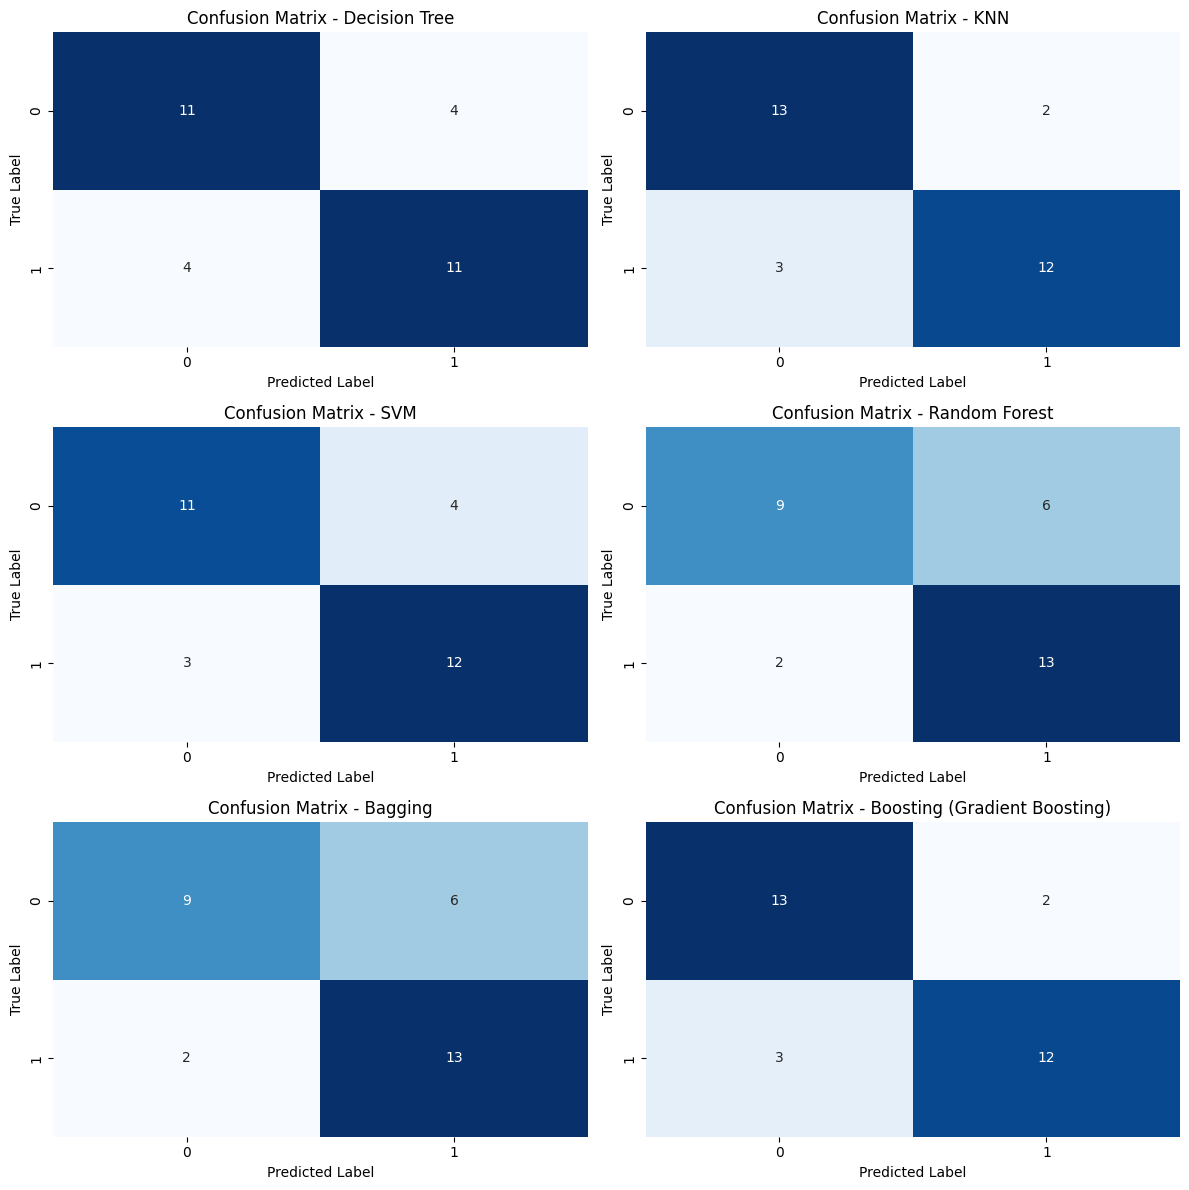

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

num_models = len(models)  
rows = (num_models // 2) + (num_models % 2)  

plt.figure(figsize=(12, rows * 4))  

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)  
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, 2, i + 1)  # Adjust grid dynamically
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()
